# HR Analytics DATA 
Sourced From [Kaggle Dataset- Employee Attrition and Factors](https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors)

In [1]:
#Senbagaraman - https://github.com/senbagaraman04/ml-basics/tree/main/2023

### Import Libraries

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


### Read the Data

In [3]:
df = pd.read_csv('./HR_Analytics.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

### Find any missing values


In [5]:
df.isnull().count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

 1470 rows with 35 columns 

In [6]:
#List all the columns in the file 
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Column Types

In [7]:
df.dtypes
cat_coulmns  = df.select_dtypes(['object']).columns

num_coulmns  = df.select_dtypes(['int64']).columns

print(cat_coulmns)
print(num_coulmns)


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'DailyRate'}>,
        <AxesSubplot: title={'center': 'DistanceFromHome'}>,
        <AxesSubplot: title={'center': 'Education'}>,
        <AxesSubplot: title={'center': 'EmployeeCount'}>],
       [<AxesSubplot: title={'center': 'EmployeeNumber'}>,
        <AxesSubplot: title={'center': 'EnvironmentSatisfaction'}>,
        <AxesSubplot: title={'center': 'HourlyRate'}>,
        <AxesSubplot: title={'center': 'JobInvolvement'}>,
        <AxesSubplot: title={'center': 'JobLevel'}>],
       [<AxesSubplot: title={'center': 'JobSatisfaction'}>,
        <AxesSubplot: title={'center': 'MonthlyIncome'}>,
        <AxesSubplot: title={'center': 'MonthlyRate'}>,
        <AxesSubplot: title={'center': 'NumCompaniesWorked'}>,
        <AxesSubplot: title={'center': 'PercentSalaryHike'}>],
       [<AxesSubplot: title={'center': 'PerformanceRating'}>,
        <AxesSubplot: title={'center': 'RelationshipSatisfaction'}>

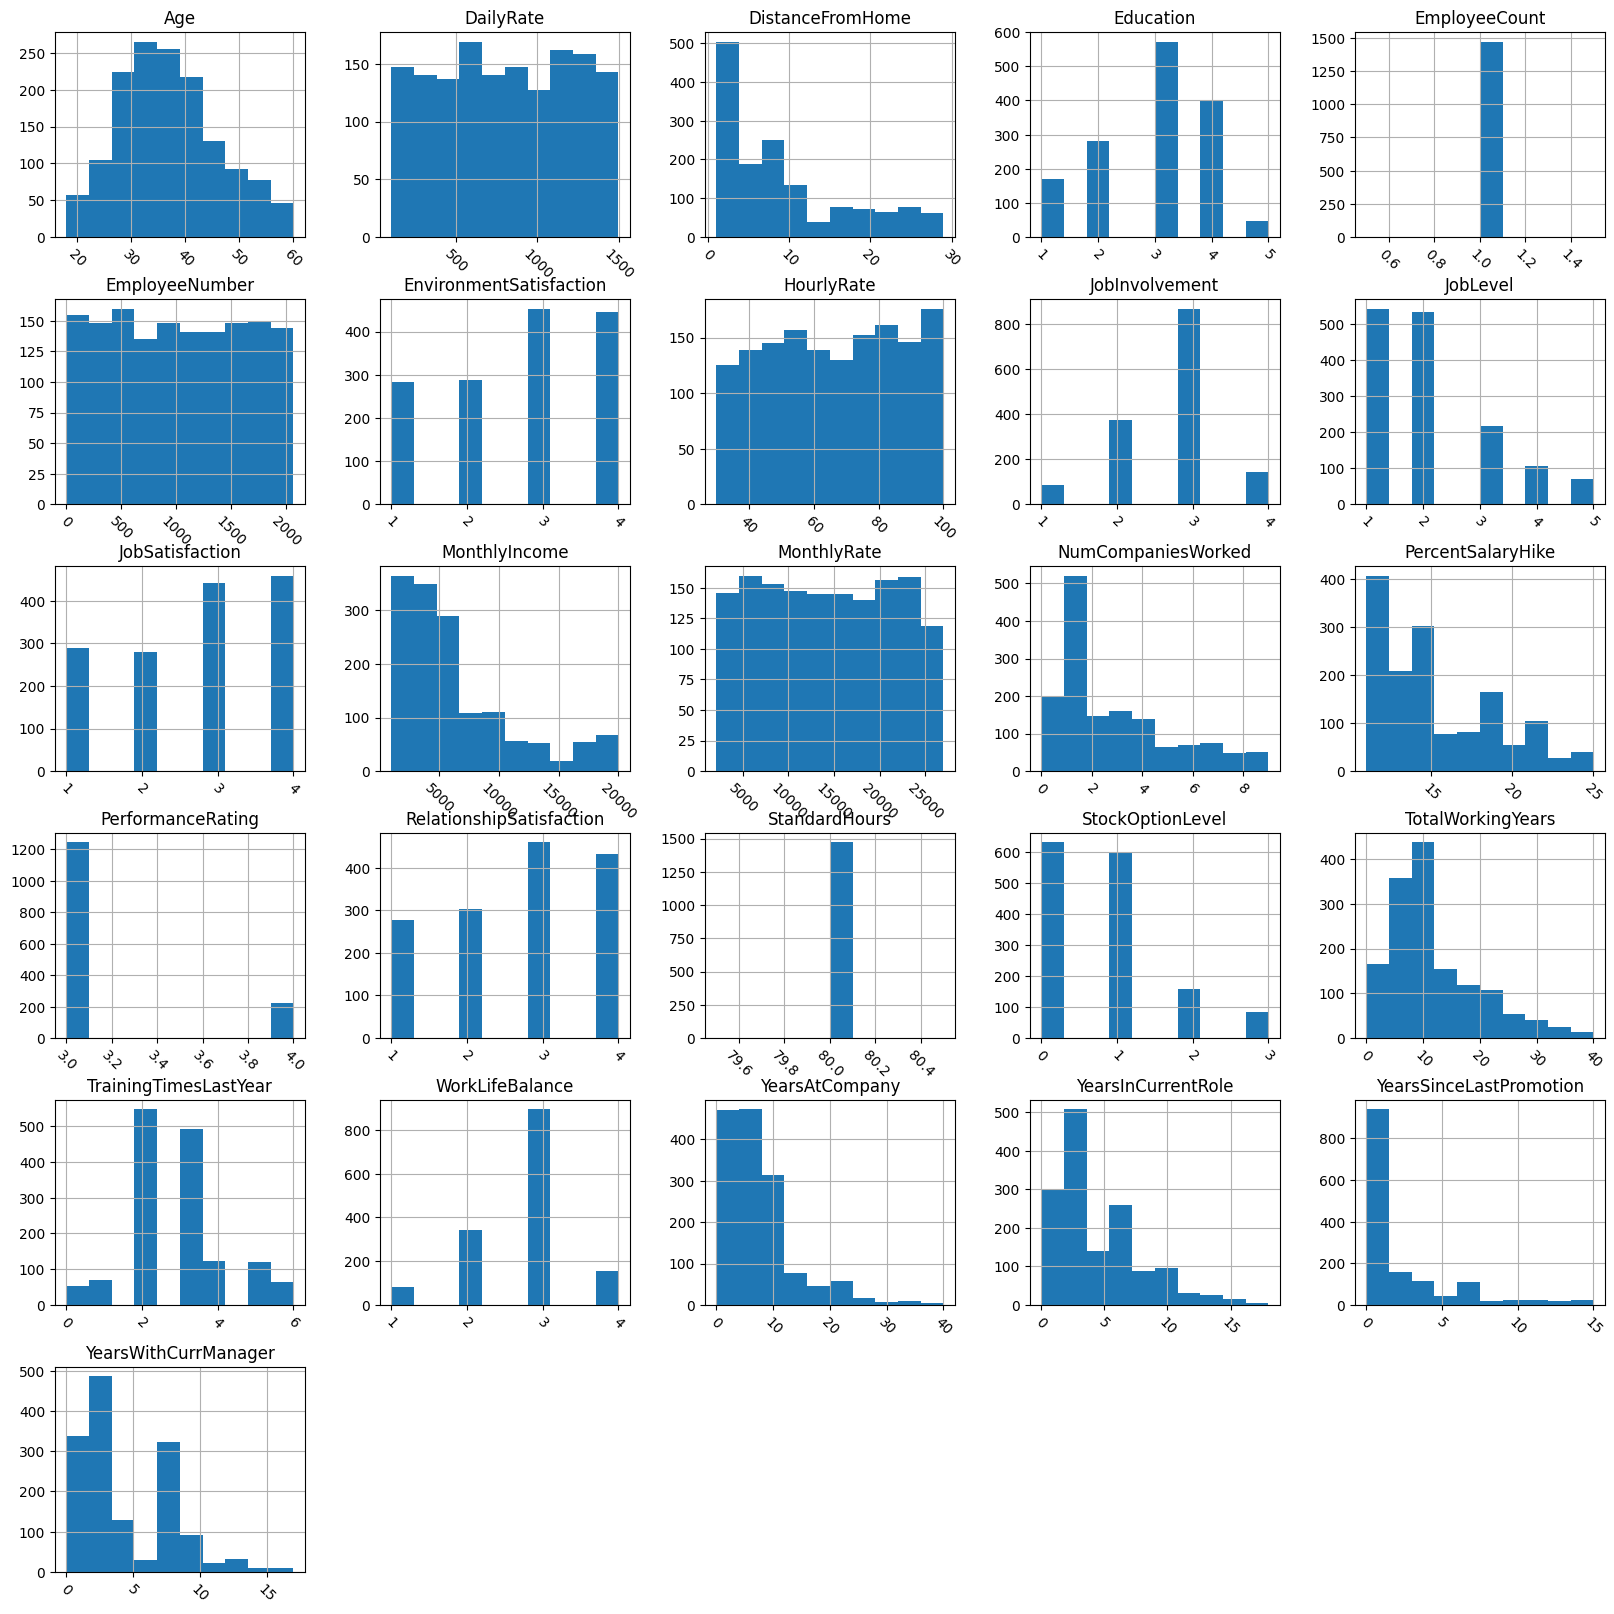

In [9]:
df.hist(figsize=(20,20), xrot=-45)

The following rows are dropped as the values will not be a factor to determine the end result. 

| Column Name | Reason |
| ---- | ---- |
| ```Over18``` | All the values in this column corresponds to ```yes``` |
| ```EmployeeCount``` | All the values corresponds to 1 |
| ```StandardHours``` | All the values corresponds to standard working hrs |
| ```EmployeeNumber``` | Unqiue number representing the employee(like roll number) | 

In [10]:

df.drop('Over18', axis=1, inplace=True)
df.drop('EmployeeCount', axis=1, inplace=True)
df.drop('StandardHours', axis=1, inplace=True)
df.drop('EmployeeNumber', axis=1, inplace=True)

### Correlation Heatmap

<AxesSubplot: >

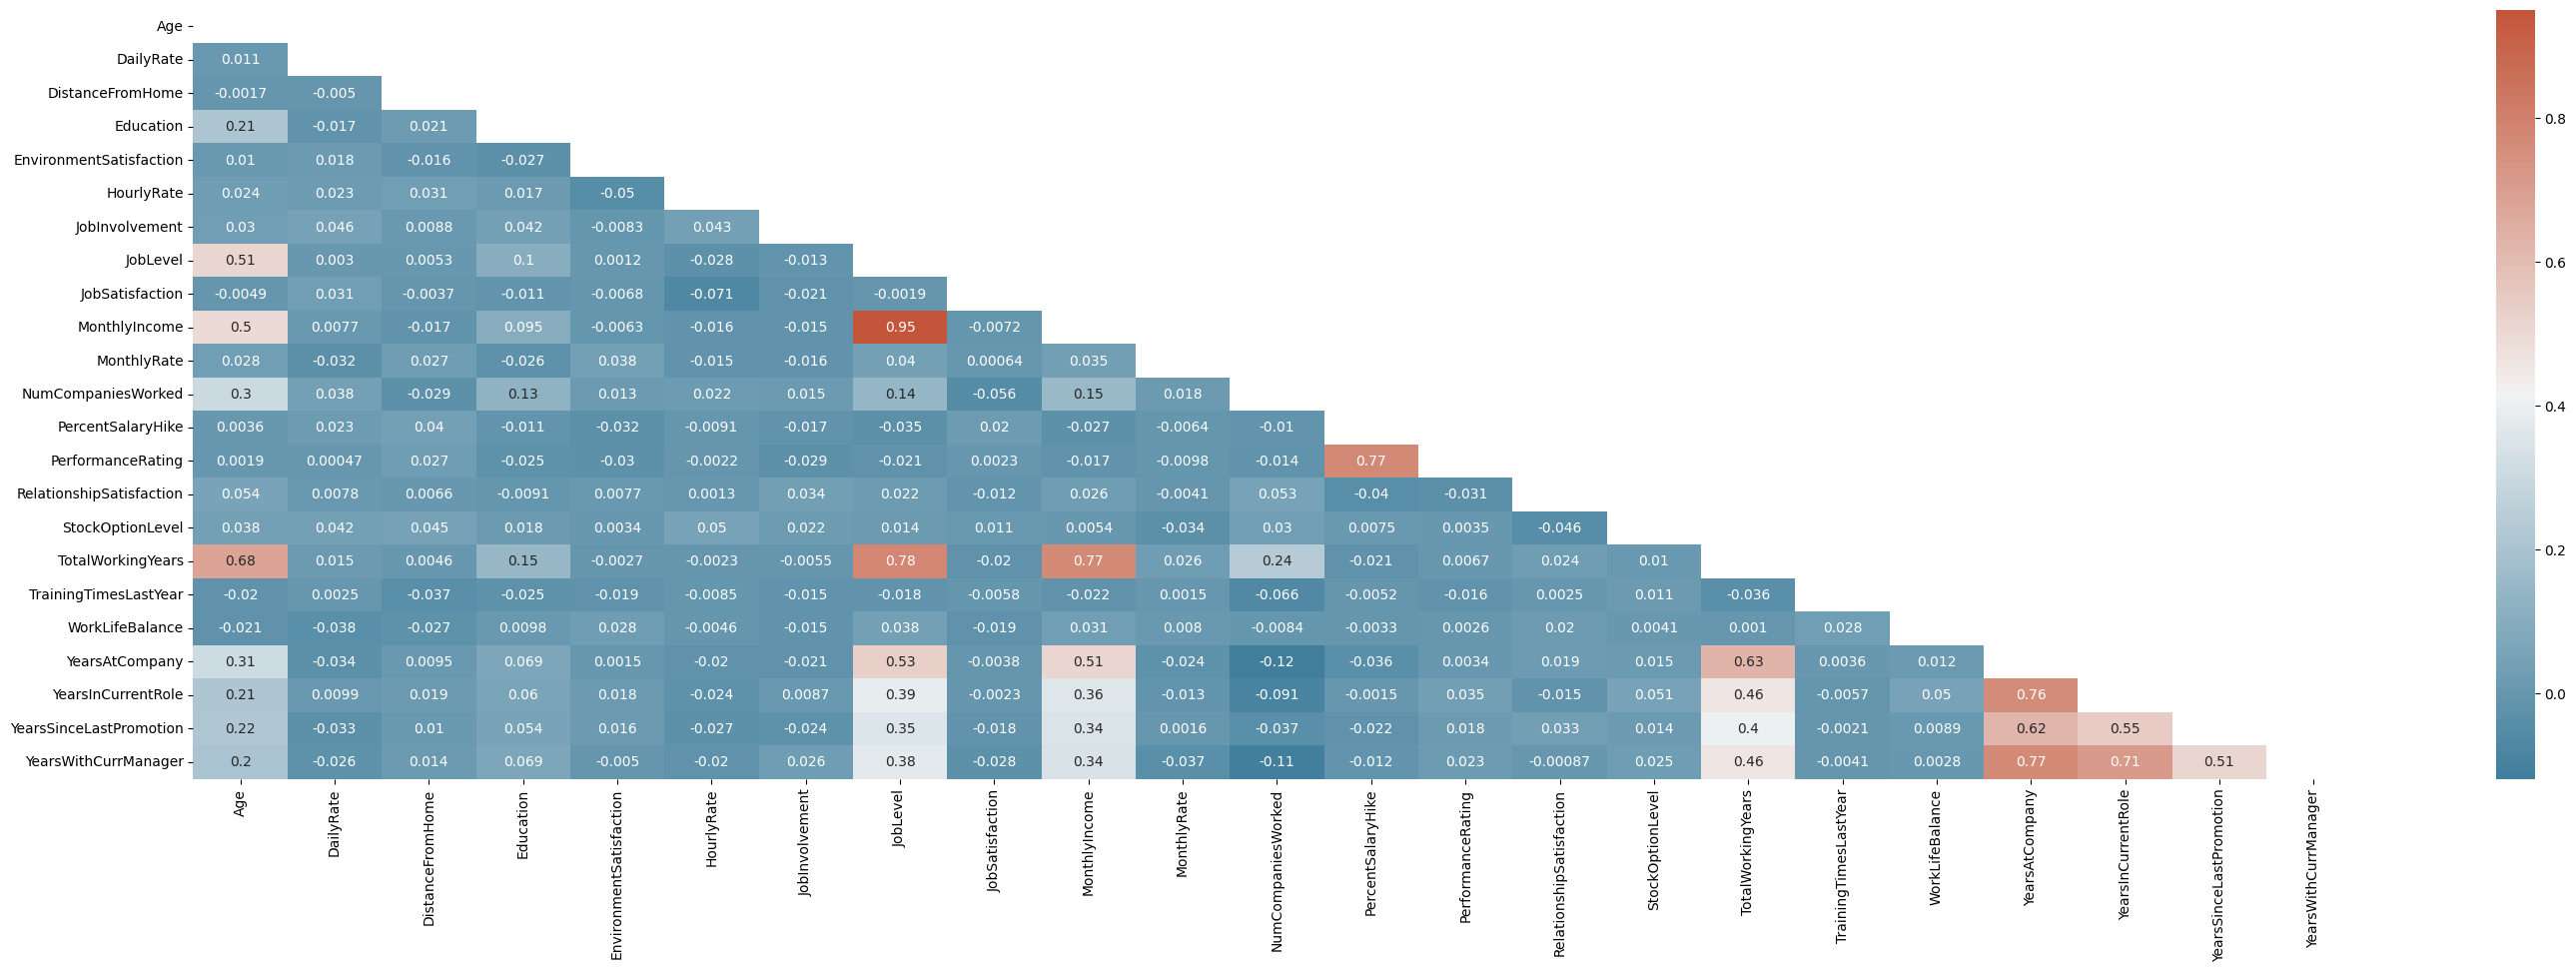

In [11]:

corr = df.corr()

f, ax = plt.subplots(figsize=(35, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

### Transform the Dataset 


In [12]:
cat_coulmns = cat_coulmns.drop('Over18') #Since we droppped over18, we are removing from the cat_columns

In [13]:
from sklearn.preprocessing import LabelEncoder


for col in cat_coulmns:
    le = LabelEncoder()
    label = le.fit_transform(df[col])
    df.drop(col,axis=1, inplace=True)
    df[col]= label

The dataset seems to be a unbalanced one, 

In [14]:
print('Attrition Count \n', df['Attrition'].value_counts())
print('\n')
print('Percentage \n', df['Attrition'].value_counts(normalize=True)*100)

Attrition Count 
 0    1233
1     237
Name: Attrition, dtype: int64


Percentage 
 0    83.877551
1    16.122449
Name: Attrition, dtype: float64


It is a imbalanced dataset.

In [15]:
# Create the feature and target dataset for training and testing the model.

# Import the required libraries 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier    
from sklearn import metrics
from sklearn.metrics import  classification_report

X = df.drop(['Attrition'],axis=1)
y = df['Attrition']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

# Modeling a decision tree.
dtree_clf = DecisionTreeClassifier(random_state = 20)
dtree_clf.fit(X_train, y_train)
y_train_pred = dtree_clf.predict(X_train)
y_test_pred = dtree_clf.predict(X_test)

# Print the classifier performance scores
print(f"Accuracy on the train set: {metrics.accuracy_score(y_train, y_train_pred):.4f}\n")
print(f"Accuracy on the test set: {metrics.accuracy_score(y_test, y_test_pred):.4f}")

Accuracy on the train set: 1.0000

Accuracy on the test set: 0.8027


In [16]:
# Obtain classification report for the train set

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       861
           1       1.00      1.00      1.00       168

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029



In [17]:
# Obtain classification report for the test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       372
           1       0.35      0.30      0.33        69

    accuracy                           0.80       441
   macro avg       0.61      0.60      0.61       441
weighted avg       0.79      0.80      0.80       441



The accuracy of the train dataset is close to 1, which corresponds to the dataset as not properly distributed.

To rectify these issues, we will:

Balance the dataset for majority and minority classes.
Tune the hyperparameters.
Apply cross-validation in order to obtain robust model performance.

### Undersampling and oversampling

In [18]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 30)
X_dn, y_dn = rus.fit_resample(X, y)

# Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 30)
X_up, y_up = ros.fit_resample(X, y)


print("Attr 0 : ", np.sum(y_dn == 0))
print("Attr 1 ", np.sum(y_dn == 1))


print("Att (up) 0 ", np.sum(y_up == 0))
print("Attr (down) 1 ", np.sum(y_up == 1))

Attr 0 :  237
Attr 1  237
Att (up) 0  1233
Attr (down) 1  1233


In [19]:
# Smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)

print("Att (smot) 0: ", np.sum(y_smote == 0))
print("Att (smot) 0: ", np.sum(y_smote == 1))

Att (smot) 0:  1233
Att (smot) 0:  1233


In [20]:
# Import the required packages 
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Perform the train-test split on the UpScaled
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, random_state=42)

#Perform the train-test split on the DownScaled
X_train_dn, X_test_dn, y_train_dn, y_test_dn = train_test_split(X_dn, y_dn, random_state=42)

#Perform the train-test split on the Smote
X_train_smot, X_test_smot, y_train_smot, y_test_smot = train_test_split(X_smote, y_smote, random_state=42)

### Logistics Regression

In [21]:
# Define the parameter grid and fit the model
param_grid = {'logisticregression__C': [1, 10, 50, 100]}
model_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Use AUC score as parameter
grid_lr = GridSearchCV(model_lr, param_grid=param_grid, scoring=["roc_auc", 'average_precision', 'accuracy'],refit='roc_auc')
grid_lr.fit(X_train_dn, y_train_dn)

best_lr_dn = grid_lr.best_params_
best_lr_dn = grid_lr.best_estimator_
print(best_lr_dn)

# Obtain the performance scores
#print("Cross-validated best score {}%".format(round(grid_lr.best_score_ * 100, 3)))
predictions = best_lr_dn.predict(X_test_dn)
#print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_dn, y_pred = predictions) * 100, 3)))

# Store and append the classifier performance metrics to the results DataFrame
results_df = pd.DataFrame(
    data=[["LR DownSample ", accuracy_score(y_test_dn, predictions),
           metrics.precision_score(y_test_dn, predictions),
           metrics.recall_score(y_test_dn, predictions), 
           metrics.f1_score(y_test_dn, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])


print(results_df)
#LR DownSample   0.705882   0.704918  0.716667  0.710744  0.836984
 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1, max_iter=1000))])
            Model  Accuracy  Precision    Recall  F1 Score        CV
0  LR DownSample   0.705882   0.704918  0.716667  0.710744  0.836984


In [22]:
# Define the parameter grid and fit the model
param_grid = {'logisticregression__C': [1, 10, 50, 100]}
model_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Use AUC score as parameter
grid_lr = GridSearchCV(model_lr, param_grid=param_grid, scoring=["roc_auc", 'average_precision', 'accuracy'],refit='roc_auc')
grid_lr.fit(X_train_up, y_train_up)
best_lr_up = grid_lr.best_params_
best_lr_up = grid_lr.best_estimator_
print(best_lr_up)

# Obtain the performance scores
#print("Cross-validated best score {}%".format(round(grid_lr.best_score_ * 100, 3)))
predictions = best_lr_up.predict(X_test_up)
#print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_up, y_pred = predictions) * 100, 3)))

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["LR Up-Sample ", accuracy_score(y_test_up, predictions),
           metrics.precision_score(y_test_up, predictions),
           metrics.recall_score(y_test_up, predictions), 
           metrics.f1_score(y_test_up, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1, max_iter=1000))])
            Model  Accuracy  Precision    Recall  F1 Score        CV
0  LR DownSample   0.705882   0.704918  0.716667  0.710744  0.836984
1   LR Up-Sample   0.756888   0.743750  0.777778  0.760383  0.838343


In [23]:
# Define the parameter grid and fit the model
param_grid = {'logisticregression__C': [1, 10, 50, 100]}
model_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Use AUC score as parameter
grid_lr = GridSearchCV(model_lr, param_grid=param_grid, scoring=["roc_auc", 'average_precision', 'accuracy'],refit='roc_auc')
grid_lr.fit(X_train_smot, y_train_smot)
best_lr_smot = grid_lr.best_params_
best_lr_smot = grid_lr.best_estimator_
print(best_lr_smot)

# Obtain the performance scores
#print("Cross-validated best score {}%".format(round(grid_lr.best_score_ * 100, 3)))
predictions = best_lr_smot.predict(X_test_smot)
#print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_up, y_pred = predictions) * 100, 3)))

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["LR SMOT-Sample ", accuracy_score(y_test_smot, predictions),
           metrics.precision_score(y_test_smot, predictions),
           metrics.recall_score(y_test_smot, predictions), 
           metrics.f1_score(y_test_smot, predictions), grid_lr.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1, max_iter=1000))])
             Model  Accuracy  Precision    Recall  F1 Score        CV
0   LR DownSample   0.705882   0.704918  0.716667  0.710744  0.836984
1    LR Up-Sample   0.756888   0.743750  0.777778  0.760383  0.838343
2  LR SMOT-Sample   0.799028   0.789809  0.810458  0.800000  0.902291


### K-Nearest Neighbours

In [24]:
# Define the parameter grid and fit the model
param_grid = {'kneighborsclassifier__n_neighbors': range(2,10)}
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
grid_knn = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', verbose = 3)
grid_knn.fit(X_train_smot, y_train_smot)
best_knn_smot = grid_knn.best_estimator_
print(best_knn_smot)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_knn.best_score_ * 100, 3)))
predictions = best_knn_smot.predict(X_test_smot)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_smot, y_pred = predictions) * 100, 3)))

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["KNN SMOT-Sample ", accuracy_score(y_test_smot, predictions),
           metrics.precision_score(y_test_smot, predictions),
           metrics.recall_score(y_test_smot, predictions), 
           metrics.f1_score(y_test_smot, predictions), grid_knn.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END kneighborsclassifier__n_neighbors=2;, score=0.914 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=2;, score=0.893 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=2;, score=0.934 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=2;, score=0.903 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=2;, score=0.892 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=3;, score=0.932 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=3;, score=0.925 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=3;, score=0.951 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=3;, score=0.916 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=3;, score=0.888 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=4;, score=0.937 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_n

In [ ]:
# Define the parameter grid and fit the model
param_grid = {'kneighborsclassifier__n_neighbors': range(2,10)}
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
grid_knn = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', verbose = 3)
grid_knn.fit(X_train_up, y_train_up)
best_knn_up = grid_knn.best_estimator_
print(best_knn_up)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_knn.best_score_ * 100, 3)))
predictions = best_knn_up.predict(X_test_up)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_up, y_pred = predictions) * 100, 3)))

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["KNN up-Sample ", accuracy_score(y_test_up, predictions),
           metrics.precision_score(y_test_up, predictions),
           metrics.recall_score(y_test_up, predictions), 
           metrics.f1_score(y_test_up, predictions), grid_knn.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END kneighborsclassifier__n_neighbors=2;, score=0.929 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=2;, score=0.908 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=2;, score=0.933 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=2;, score=0.911 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=2;, score=0.898 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=3;, score=0.909 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=3;, score=0.910 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=3;, score=0.913 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=3;, score=0.891 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=3;, score=0.888 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=4;, score=0.897 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_n

In [ ]:
# Define the parameter grid and fit the model
param_grid = {'kneighborsclassifier__n_neighbors': range(2,10)}
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
grid_knn = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', verbose = 3)
grid_knn.fit(X_train_dn, y_train_dn)
best_knn_dn = grid_knn.best_estimator_
print(best_knn_dn)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_knn.best_score_ * 100, 3)))
predictions = best_knn_dn.predict(X_test_dn)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_dn, y_pred = predictions) * 100, 3)))

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["KNN dn-Sample ", accuracy_score(y_test_dn, predictions),
           metrics.precision_score(y_test_dn, predictions),
           metrics.recall_score(y_test_dn, predictions), 
           metrics.f1_score(y_test_dn, predictions), grid_knn.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END kneighborsclassifier__n_neighbors=2;, score=0.679 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=2;, score=0.666 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=2;, score=0.619 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=2;, score=0.668 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=2;, score=0.599 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=3;, score=0.738 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_neighbors=3;, score=0.692 total time=   0.0s
[CV 3/5] END kneighborsclassifier__n_neighbors=3;, score=0.668 total time=   0.0s
[CV 4/5] END kneighborsclassifier__n_neighbors=3;, score=0.704 total time=   0.0s
[CV 5/5] END kneighborsclassifier__n_neighbors=3;, score=0.630 total time=   0.0s
[CV 1/5] END kneighborsclassifier__n_neighbors=4;, score=0.746 total time=   0.0s
[CV 2/5] END kneighborsclassifier__n_n

### SVC

In [ ]:
# Import the required packages
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid and fit the model
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
param_grid = {'svm__C': [0.1, 1, 10], 'svm__gamma': [0.1, 1, 10]}
grid_svc = GridSearchCV(pipe, param_grid=param_grid, n_jobs = -1)
grid_svc.fit(X_train_dn, y_train_dn)
best_svc= grid_svc.best_estimator_
print(best_svc)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_svc.best_score_ * 100, 3)))
predictions = best_svc.predict(X_test_dn)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_dn, y_pred = predictions) * 100, 3)))

# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["SVC dn-Sample ", accuracy_score(y_test_dn, predictions),
           metrics.precision_score(y_test_dn, predictions),
           metrics.recall_score(y_test_dn, predictions), 
           metrics.f1_score(y_test_dn, predictions), grid_svc.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC(C=10, gamma=0.1))])
Cross-validated best score 76.056%
Test score: 74.242%
              Model  Accuracy  Precision    Recall  F1 Score        CV
0    LR DownSample   0.705882   0.704918  0.716667  0.710744  0.836984
1     LR Up-Sample   0.756888   0.743750  0.777778  0.760383  0.838343
2   LR SMOT-Sample   0.799028   0.789809  0.810458  0.800000  0.902291
3  KNN SMOT-Sample   0.865478   0.807163  0.957516  0.875934  0.928719
4    KNN up-Sample   0.918963   0.900000  0.941176  0.920128  0.916041
5    KNN dn-Sample   0.722689   0.745455  0.683333  0.713043  0.743492
6    SVC dn-Sample   0.764706   0.742424  0.816667  0.777778  0.760563


Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC(C=1, gamma=10))])
Cross-validated best score 97.62%
Test score: 100.0%
              Model  Accuracy  Precision    Recall  F1 Score        CV
0    LR DownSample   0.705882   0.704918  0.716667  0.710744  0.836984
1     LR Up-Sample   0.756888   0.743750  0.777778  0.760383  0.838343
2   LR SMOT-Sample   0.799028   0.789809  0.810458  0.800000  0.902291
3  KNN SMOT-Sample   0.865478   0.807163  0.957516  0.875934  0.928719
4    KNN up-Sample   0.918963   0.900000  0.941176  0.920128  0.916041
5    KNN dn-Sample   0.722689   0.745455  0.683333  0.713043  0.743492
6    SVC dn-Sample   0.764706   0.742424  0.816667  0.777778  0.760563
7    SVC up-Sample   0.990276   1.000000  0.980392  0.990099  0.976200


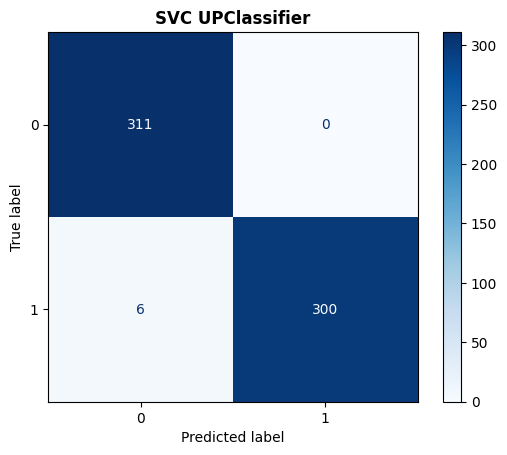

In [ ]:
# SVC - UP Sample

# Import the required packages
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid and fit the model
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
param_grid = {'svm__C': [0.1, 1, 10], 'svm__gamma': [0.1, 1, 10]}
grid_svc = GridSearchCV(pipe, param_grid=param_grid, n_jobs = -1)
grid_svc.fit(X_train_up, y_train_up)
best_svc= grid_svc.best_estimator_
print(best_svc)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_svc.best_score_ * 100, 3)))
predictions = best_svc.predict(X_test_up)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_up, y_pred = predictions) * 100, 3)))


# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["SVC up-Sample ", accuracy_score(y_test_up, predictions),
           metrics.precision_score(y_test_up, predictions),
           metrics.recall_score(y_test_up, predictions), 
           metrics.f1_score(y_test_up, predictions), grid_svc.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)


# Obtain the predicted labels for the test dataset
y_pred= best_svc.predict(X_test_up)
#pr_svc = plot_precision_recall_curve(best_svc, X_test_up, y_test_up)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_up, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("SVC UPClassifier", fontweight= "bold")
plt.show()

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC(C=10, gamma=1))])
Cross-validated best score 91.561%
Test score: 92.333%
              Model  Accuracy  Precision    Recall  F1 Score        CV
0    LR DownSample   0.705882   0.704918  0.716667  0.710744  0.836984
1     LR Up-Sample   0.756888   0.743750  0.777778  0.760383  0.838343
2   LR SMOT-Sample   0.799028   0.789809  0.810458  0.800000  0.902291
3  KNN SMOT-Sample   0.865478   0.807163  0.957516  0.875934  0.928719
4    KNN up-Sample   0.918963   0.900000  0.941176  0.920128  0.916041
5    KNN dn-Sample   0.722689   0.745455  0.683333  0.713043  0.743492
6    SVC dn-Sample   0.764706   0.742424  0.816667  0.777778  0.760563
7    SVC up-Sample   0.990276   1.000000  0.980392  0.990099  0.976200
8  SVC smot-Sample   0.915721   0.923333  0.905229  0.914191  0.915614


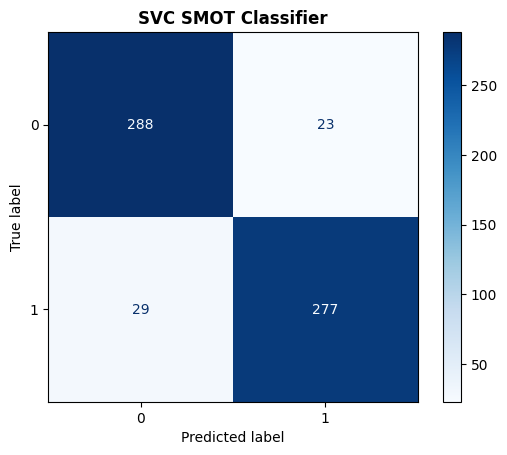

In [ ]:
# Define the parameter grid and fit the model
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
param_grid = {'svm__C': [0.1, 1, 10], 'svm__gamma': [0.1, 1, 10]}
grid_svc = GridSearchCV(pipe, param_grid=param_grid, n_jobs = -1)
grid_svc.fit(X_train_smot, y_train_smot)
best_svc= grid_svc.best_estimator_
print(best_svc)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_svc.best_score_ * 100, 3)))
predictions = best_svc.predict(X_test_smot)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_smot, y_pred = predictions) * 100, 3)))


# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["SVC smot-Sample ", accuracy_score(y_test_smot, predictions),
           metrics.precision_score(y_test_smot, predictions),
           metrics.recall_score(y_test_smot, predictions), 
           metrics.f1_score(y_test_smot, predictions), grid_svc.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)


# Obtain the predicted labels for the test dataset
y_pred= best_svc.predict(X_test_smot)
#pr_svc = plot_precision_recall_curve(best_svc, X_test_smot, y_test_smot)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_smot, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("SVC SMOT Classifier", fontweight= "bold")
plt.show()

In [ ]:
# Define the parameter grid and fit the model
param_grid = {'criterion':['gini','entropy'], 'max_depth': np.arange(4,11), 'random_state': [42]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_tree.fit(X_train_dn, y_train_dn)
best_tree = grid_tree.best_estimator_
print(best_tree)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_tree.best_score_ * 100, 3)))
predictions = best_tree.predict(X_test_dn)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_dn, y_pred = predictions) * 100, 3)))
# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["DT dn-Sample ", accuracy_score(y_test_dn, predictions),
           metrics.precision_score(y_test_dn, predictions),
           metrics.recall_score(y_test_dn, predictions), 
           metrics.f1_score(y_test_dn, predictions), grid_tree.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

DecisionTreeClassifier(max_depth=7, random_state=42)
Cross-validated best score 65.246%
Test score: 59.016%
              Model  Accuracy  Precision    Recall  F1 Score        CV
0    LR DownSample   0.705882   0.704918  0.716667  0.710744  0.836984
1     LR Up-Sample   0.756888   0.743750  0.777778  0.760383  0.838343
2   LR SMOT-Sample   0.799028   0.789809  0.810458  0.800000  0.902291
3  KNN SMOT-Sample   0.865478   0.807163  0.957516  0.875934  0.928719
4    KNN up-Sample   0.918963   0.900000  0.941176  0.920128  0.916041
5    KNN dn-Sample   0.722689   0.745455  0.683333  0.713043  0.743492
6    SVC dn-Sample   0.764706   0.742424  0.816667  0.777778  0.760563
7    SVC up-Sample   0.990276   1.000000  0.980392  0.990099  0.976200
8  SVC smot-Sample   0.915721   0.923333  0.905229  0.914191  0.915614
9     DT dn-Sample   0.588235   0.590164  0.600000  0.595041  0.652460


DecisionTreeClassifier(max_depth=10, random_state=42)
Cross-validated best score 89.343%
Test score: 81.989%


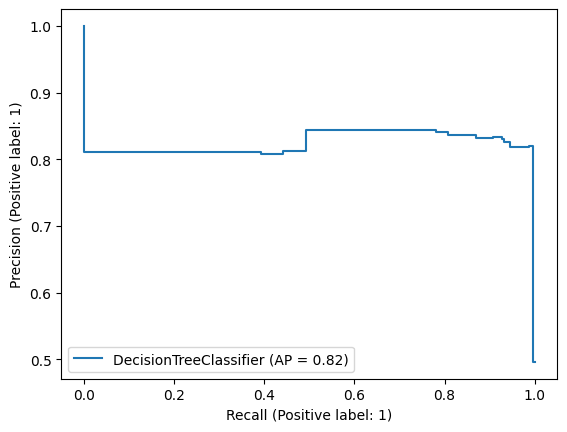

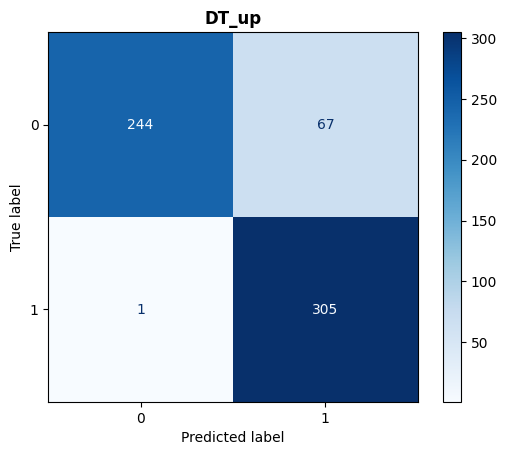

               Model  Accuracy  Precision    Recall  F1 Score        CV
0     LR DownSample   0.705882   0.704918  0.716667  0.710744  0.836984
1      LR Up-Sample   0.756888   0.743750  0.777778  0.760383  0.838343
2    LR SMOT-Sample   0.799028   0.789809  0.810458  0.800000  0.902291
3   KNN SMOT-Sample   0.865478   0.807163  0.957516  0.875934  0.928719
4     KNN up-Sample   0.918963   0.900000  0.941176  0.920128  0.916041
5     KNN dn-Sample   0.722689   0.745455  0.683333  0.713043  0.743492
6     SVC dn-Sample   0.764706   0.742424  0.816667  0.777778  0.760563
7     SVC up-Sample   0.990276   1.000000  0.980392  0.990099  0.976200
8   SVC smot-Sample   0.915721   0.923333  0.905229  0.914191  0.915614
9      DT dn-Sample   0.588235   0.590164  0.600000  0.595041  0.652460
10     DT up-Sample   0.889789   0.819892  0.996732  0.899705  0.893430


In [ ]:
# Define the parameter grid and fit the model
param_grid = {'criterion':['gini','entropy'], 'max_depth': np.arange(4,11), 'random_state': [42]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_tree.fit(X_train_up, y_train_up)
best_tree = grid_tree.best_estimator_
print(best_tree)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_tree.best_score_ * 100, 3)))
predictions = best_tree.predict(X_test_up)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_up, y_pred = predictions) * 100, 3)))


# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["DT up-Sample ", accuracy_score(y_test_up, predictions),
           metrics.precision_score(y_test_up, predictions),
           metrics.recall_score(y_test_up, predictions), 
           metrics.f1_score(y_test_up, predictions), grid_tree.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)


# Obtain the predicted labels for the test dataset
y_pred= best_tree.predict(X_test_up)
pr_log = plot_precision_recall_curve(best_tree, X_test_up, y_test_up)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_up, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("DT_up", fontweight= "bold")
plt.show()
print(results_df)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
Cross-validated best score 82.846%
Test score: 75.153%


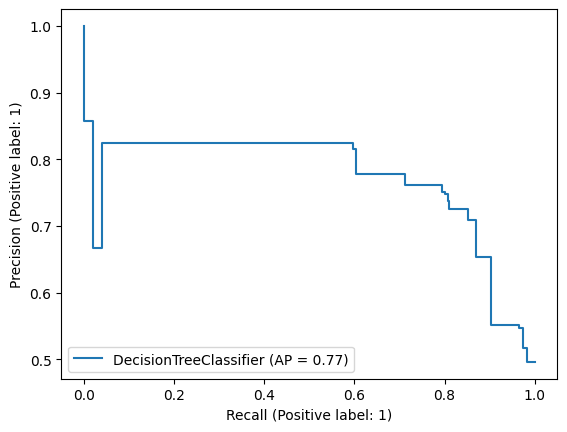

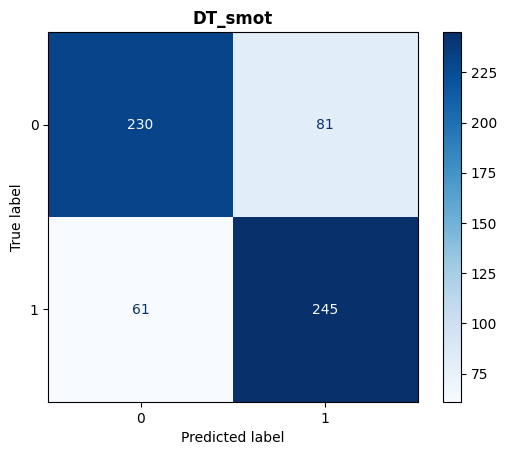

               Model  Accuracy  Precision    Recall  F1 Score        CV
0     LR DownSample   0.705882   0.704918  0.716667  0.710744  0.836984
1      LR Up-Sample   0.756888   0.743750  0.777778  0.760383  0.838343
2    LR SMOT-Sample   0.799028   0.789809  0.810458  0.800000  0.902291
3   KNN SMOT-Sample   0.865478   0.807163  0.957516  0.875934  0.928719
4     KNN up-Sample   0.918963   0.900000  0.941176  0.920128  0.916041
5     KNN dn-Sample   0.722689   0.745455  0.683333  0.713043  0.743492
6     SVC dn-Sample   0.764706   0.742424  0.816667  0.777778  0.760563
7     SVC up-Sample   0.990276   1.000000  0.980392  0.990099  0.976200
8   SVC smot-Sample   0.915721   0.923333  0.905229  0.914191  0.915614
9      DT dn-Sample   0.588235   0.590164  0.600000  0.595041  0.652460
10     DT up-Sample   0.889789   0.819892  0.996732  0.899705  0.893430
11   DT smot-Sample   0.769854   0.751534  0.800654  0.775316  0.828464


In [ ]:
# Define the parameter grid and fit the model
param_grid = {'criterion':['gini','entropy'], 'max_depth': np.arange(4,11), 'random_state': [42]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_tree.fit(X_train_smot, y_train_smot)
best_tree = grid_tree.best_estimator_
print(best_tree)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_tree.best_score_ * 100, 3)))
predictions = best_tree.predict(X_test_smot)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_smot, y_pred = predictions) * 100, 3)))


# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["DT smot-Sample ", accuracy_score(y_test_smot, predictions),
           metrics.precision_score(y_test_smot, predictions),
           metrics.recall_score(y_test_smot, predictions), 
           metrics.f1_score(y_test_smot, predictions), grid_tree.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)


# Obtain the predicted labels for the test dataset
y_pred= best_tree.predict(X_test_smot)
pr_log = plot_precision_recall_curve(best_tree, X_test_smot, y_test_smot)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_smot, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("DT_smot", fontweight= "bold")
plt.show()
print(results_df)

In [ ]:
# Define the parameter grid and fit the model
param_grid = {'n_estimators':[10,50,100]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_rf.fit(X_train_dn, y_train_dn)
best_rf = grid_rf.best_estimator_
print(best_rf)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_rf.best_score_ * 100, 3)))
predictions = best_rf.predict(X_test_dn)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_dn, y_pred = predictions) * 100, 3)))
# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["RF dn-Sample ", accuracy_score(y_test_dn, predictions),
           metrics.precision_score(y_test_dn, predictions),
           metrics.recall_score(y_test_dn, predictions), 
           metrics.f1_score(y_test_dn, predictions), grid_rf.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

RandomForestClassifier()
Cross-validated best score 80.032%
Test score: 70.588%
               Model  Accuracy  Precision    Recall  F1 Score        CV
0     LR DownSample   0.705882   0.704918  0.716667  0.710744  0.836984
1      LR Up-Sample   0.756888   0.743750  0.777778  0.760383  0.838343
2    LR SMOT-Sample   0.799028   0.789809  0.810458  0.800000  0.902291
3   KNN SMOT-Sample   0.865478   0.807163  0.957516  0.875934  0.928719
4     KNN up-Sample   0.918963   0.900000  0.941176  0.920128  0.916041
5     KNN dn-Sample   0.722689   0.745455  0.683333  0.713043  0.743492
6     SVC dn-Sample   0.764706   0.742424  0.816667  0.777778  0.760563
7     SVC up-Sample   0.990276   1.000000  0.980392  0.990099  0.976200
8   SVC smot-Sample   0.915721   0.923333  0.905229  0.914191  0.915614
9      DT dn-Sample   0.588235   0.590164  0.600000  0.595041  0.652460
10     DT up-Sample   0.889789   0.819892  0.996732  0.899705  0.893430
11   DT smot-Sample   0.769854   0.751534  0.800654  0.7

RandomForestClassifier()
Cross-validated best score 98.885%
Test score: 95.283%


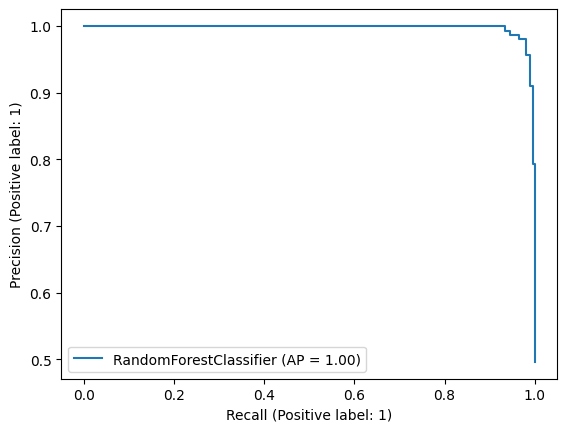

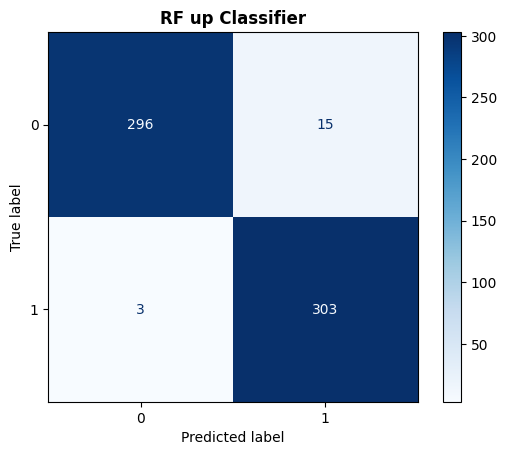

               Model  Accuracy  Precision    Recall  F1 Score        CV
0     LR DownSample   0.705882   0.704918  0.716667  0.710744  0.836984
1      LR Up-Sample   0.756888   0.743750  0.777778  0.760383  0.838343
2    LR SMOT-Sample   0.799028   0.789809  0.810458  0.800000  0.902291
3   KNN SMOT-Sample   0.865478   0.807163  0.957516  0.875934  0.928719
4     KNN up-Sample   0.918963   0.900000  0.941176  0.920128  0.916041
5     KNN dn-Sample   0.722689   0.745455  0.683333  0.713043  0.743492
6     SVC dn-Sample   0.764706   0.742424  0.816667  0.777778  0.760563
7     SVC up-Sample   0.990276   1.000000  0.980392  0.990099  0.976200
8   SVC smot-Sample   0.915721   0.923333  0.905229  0.914191  0.915614
9      DT dn-Sample   0.588235   0.590164  0.600000  0.595041  0.652460
10     DT up-Sample   0.889789   0.819892  0.996732  0.899705  0.893430
11   DT smot-Sample   0.769854   0.751534  0.800654  0.775316  0.828464
12     RF dn-Sample   0.731092   0.705882  0.800000  0.750000  0

In [ ]:
# Define the parameter grid and fit the model
param_grid = {'n_estimators':[10,50,100]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_rf.fit(X_train_up, y_train_up)
best_rf = grid_rf.best_estimator_
print(best_rf)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_rf.best_score_ * 100, 3)))
predictions = best_rf.predict(X_test_up)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_up, y_pred = predictions) * 100, 3)))


# Obtain the predicted labels for the test dataset
y_pred= best_rf.predict(X_test_up)
pr_log = plot_precision_recall_curve(best_rf, X_test_up, y_test_up)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_up, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("RF up Classifier", fontweight= "bold")
plt.show()


# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["RF up-Sample ", accuracy_score(y_test_up, predictions),
           metrics.precision_score(y_test_up, predictions),
           metrics.recall_score(y_test_up, predictions), 
           metrics.f1_score(y_test_up, predictions), grid_rf.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)

RF SMOT

RandomForestClassifier()
Cross-validated best score 96.236%
Test score: 92.593%


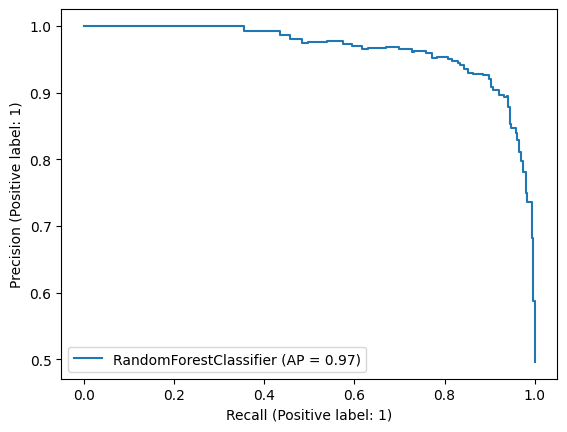

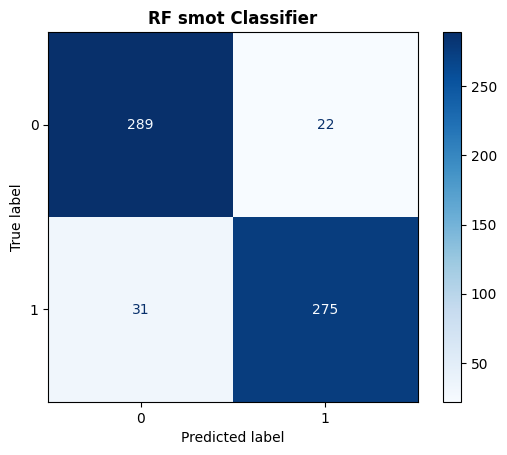

               Model  Accuracy  Precision    Recall  F1 Score        CV
0     LR DownSample   0.705882   0.704918  0.716667  0.710744  0.836984
1      LR Up-Sample   0.756888   0.743750  0.777778  0.760383  0.838343
2    LR SMOT-Sample   0.799028   0.789809  0.810458  0.800000  0.902291
3   KNN SMOT-Sample   0.865478   0.807163  0.957516  0.875934  0.928719
4     KNN up-Sample   0.918963   0.900000  0.941176  0.920128  0.916041
5     KNN dn-Sample   0.722689   0.745455  0.683333  0.713043  0.743492
6     SVC dn-Sample   0.764706   0.742424  0.816667  0.777778  0.760563
7     SVC up-Sample   0.990276   1.000000  0.980392  0.990099  0.976200
8   SVC smot-Sample   0.915721   0.923333  0.905229  0.914191  0.915614
9      DT dn-Sample   0.588235   0.590164  0.600000  0.595041  0.652460
10     DT up-Sample   0.889789   0.819892  0.996732  0.899705  0.893430
11   DT smot-Sample   0.769854   0.751534  0.800654  0.775316  0.828464
12     RF dn-Sample   0.731092   0.705882  0.800000  0.750000  0

In [ ]:

# RF - SMOT

# Define the parameter grid and fit the model
param_grid = {'n_estimators':[10,50,100]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'roc_auc', n_jobs = -1)
grid_rf.fit(X_train_smot, y_train_smot)
best_rf = grid_rf.best_estimator_
print(best_rf)

# Obtain the performance scores
print("Cross-validated best score {}%".format(round(grid_rf.best_score_ * 100, 3)))
predictions = best_rf.predict(X_test_smot)
print("Test score: {}%".format(round(metrics.precision_score(y_true = y_test_smot, y_pred = predictions) * 100, 3)))


# Obtain the predicted labels for the test dataset
y_pred= best_rf.predict(X_test_smot)
pr_log = plot_precision_recall_curve(best_rf, X_test_smot, y_test_smot)

# Obtain the precision recall curve and confusion matrix
cm = confusion_matrix(y_test_smot, y_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_log = disp_log.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("RF smot Classifier", fontweight= "bold")
plt.show()


# Store and append the classifier performance metrics to the results DataFrame
rf_results_df = pd.DataFrame(
    data=[["RF smot-Sample ", accuracy_score(y_test_smot, predictions),
           metrics.precision_score(y_test_smot, predictions),
           metrics.recall_score(y_test_smot, predictions), 
           metrics.f1_score(y_test_smot, predictions), grid_rf.best_score_ ]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "CV"])

results_df = results_df.append(rf_results_df, ignore_index=True)
print(results_df)